In [1]:
import fsps
import emcee
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sedpy import attenuation as att

# 1.1 and 1.2

In [149]:
wl = np.arange(1000.,10001.)

Set up part A: make a bunch of extinction laws

In [260]:
#tau_v = 1 means the optical depth is 1 at 5500 angstroms, which is basically V-band
power_law = att.powerlaw(wl,tau_v=1, alpha=1.0)
calz = att.calzetti(wl,tau_v=1, R_v=4.05)
card = att.cardelli(wl, tau_v=1, R_v=3.1)
smc = att.smc(wl, tau_v=1)
lmc = att.lmc(wl,tau_v=1)
curves = [power_law,calz,card,smc,lmc]
labels = ['Power Law','Calzetti','Cardelli','SMC','LMC']
specify_dash = ['',[8, 4],[8, 4, 2, 4],[2, 4],[20, 4, 2, 4, 2, 4]]
wl_plot = 1/(wl/10000) #from angstroms to 1/microns

Set up part B: Find the filters we want to plot

In [261]:
sdss = fsps.find_filter('sdss')
galex = fsps.find_filter('galex')
bands = [galex[1],galex[0],sdss[0],sdss[1],sdss[3],sdss[2],sdss[4]]
print(bands)
colors = ['purple','violet','blue','green','salmon','red','maroon']

['galex_fuv', 'galex_nuv', 'sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z']


In [270]:
#find maximum of all filters of interest - can see by plotting that it's GALEX NUV
#use this value to normalize bands later
b = fsps.get_filter('galex_nuv')
tcurve = b.transmission
max_norm = np.max(np.asarray(tcurve[1]))

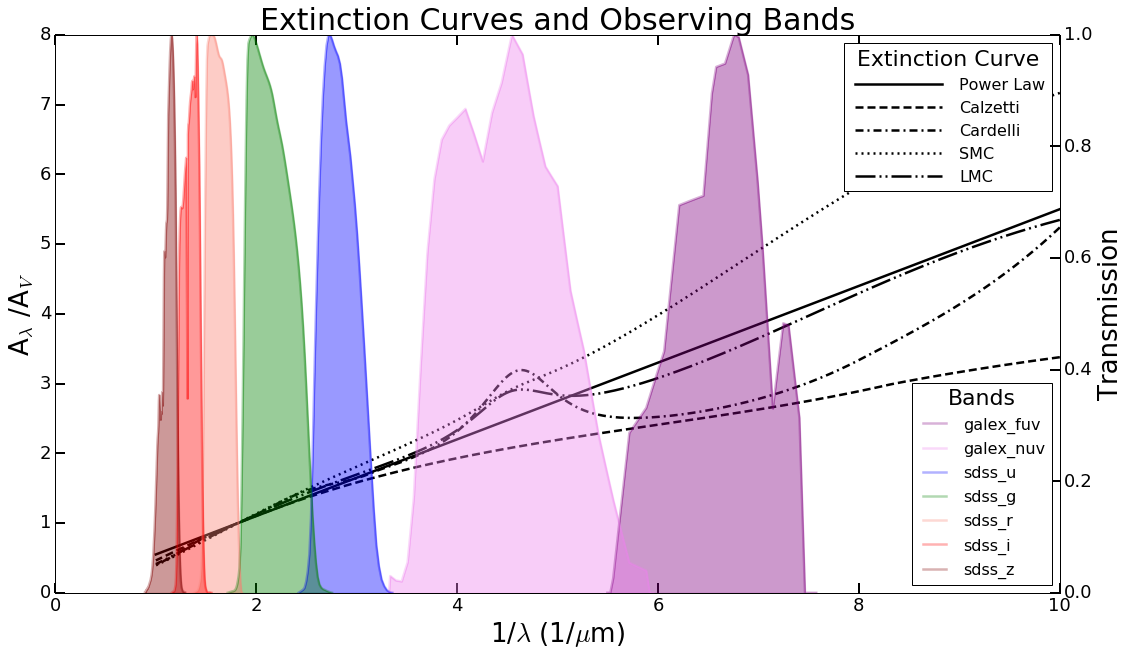

In [279]:
fig,ax1 = plt.subplots(figsize=(18, 10))

for i in range(len(curves)):
    ax1.plot(wl_plot,curves[i],label=labels[i],color='k',dashes=specify_dash[i],lw=2.5)

ax1.set_ylabel(r'A$_\lambda$ /A$_V$',fontsize=26)
ax1.set_xlabel(r'1/$\lambda$ (1/$\mu$m)',fontsize=26)
leg1 = ax1.legend(loc='upper right',title='Extinction Curve',handlelength=6,fontsize=16)
plt.setp(leg1.get_title(),fontsize=22)
ax1.tick_params(labelsize=18,length=10,width=2)

ax2 = ax1.twinx()
for j in range(len(bands)):
    b = fsps.get_filter(bands[j])
    tcurve = b.transmission
    wv = np.asarray(tcurve[0])
    fx = np.asarray(tcurve[1])
    fx_max = np.max(fx)
    fx = fx/fx_max
    wv_plot = 1/(wv/10000)
    ax2.plot(wv_plot,fx,label=bands[j],color=colors[j],lw=2.5,alpha=0.4)
    ax2.fill_between(wv_plot, fx, interpolate=True, color=colors[j],alpha=0.4)

ax2.set_ylabel('Transmission', color='k',fontsize=26)
leg2 = ax2.legend(loc='lower right',title='Bands',fontsize=16)
plt.setp(leg2.get_title(),fontsize=22)
ax2.tick_params(labelsize=18,length=10,width=2)
ax2.set_title('Extinction Curves and Observing Bands',fontsize=30)
plt.show()

# 1.3 and 1.4

In [167]:
# set up plotting for 1.3
f_b = np.arange(0,1.1,0.1)
cmap = plt.get_cmap('coolwarm')

In [236]:
# set up plotting for 1.4
#Figure out which filters look interesting in the UV
possible_uv = fsps.find_filter('uv')

print('Number of possible UV filters = '+str(len(possible_uv)))
bands_used = possible_uv[0:5] #cycle through all the filters a few at a time
n_filters = len(bands_used)
print('Number of UV filters plotted = '+str(n_filters))
print(bands_used)

Number of possible UV filters = 12
Number of UV filters plotted = 12
['wfc3_uvis_f218w', 'wfc3_uvis_f814w', 'wfc3_uvis_f438w', 'wfc3_uvis_f390w', 'wfc3_uvis_f336w', 'wfc3_uvis_f606w', 'wfc3_uvis_f775w', 'wfc3_uvis_f475w', 'wfc3_uvis_f850lp', 'wfc3_uvis_f225w', 'wfc3_uvis_f555w', 'wfc3_uvis_f275w']


I cycled through all the UV filters and plotted them against the bump. The results of this exercise were: the bands that best overlay the bump are Galex NUV, Swift UVOT M2, and HST wfc3_uvis_f225w.  In order to constrain the bump fraction we would like to not only figure out the intensity of the bump but also have a baseline in another spectral region - for now, say the V-band (Even though in class we said V isn't the best reference band for extinction studies, here we know the Conroy curve is correct).  This can be achieved by HST using wfc3_uvis_f606w, or just SDSS G band.  I decide to plot the Galex NUV and SDSS G bands: the ratio of these two should give you a good idea of how intense the bump is.

In [281]:
bands_used = ['sdss_g','galex_nuv']
colors = ['green','violet']
lines = [[12,6],[12,6]]
n_filters = len(bands_used)
#cmap2 = plt.get_cmap('gist_rainbow')

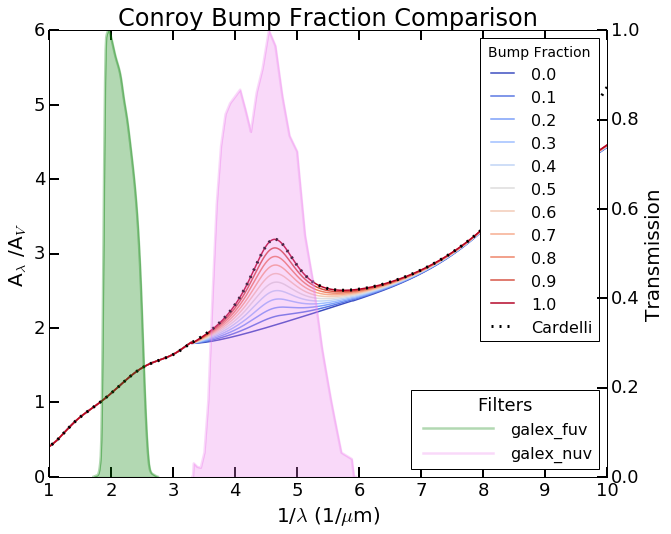

In [288]:
fig,ax1 = plt.subplots(figsize=(10,8))

#Conroy extinction curves
for bump in f_b:
    curve = att.conroy(wl, tau_v=1, R_v=3.1, f_bump=bump)
    ax1.plot(wl_plot,curve,color=cmap(bump),label=str(bump),lw=1.5,alpha=1)

#Cardelli curve
ax1.plot(wl_plot,card,color='k',lw = 3,dashes=[2,6],label='Cardelli')

ax1.set_ylabel(r'A$_\lambda$ /A$_V$',fontsize=20)
ax1.set_xlabel(r'1/$\lambda$ (1/$\mu$m)',fontsize=20)
leg1 = ax1.legend(loc='upper right',title='Bump Fraction',fontsize=16)
plt.setp(leg1.get_title(),fontsize=14)
ax1.set_title('Conroy Bump Fraction Comparison',fontsize=24)
ax1.tick_params(labelsize=18,length=10,width=2)

#Filters
ax2 = ax1.twinx()
for j in range(n_filters):
    b = fsps.get_filter(bands_used[j])
    tcurve = b.transmission
    wv = np.asarray(tcurve[0])
    fx = np.asarray(tcurve[1])
    fx_max = np.max(fx)
    fx = fx/fx_max
    wv_plot = 1/(wv/10000)
    ax2.plot(wv_plot,fx,label=bands[j],color=colors[j],lw=2.5,alpha=0.3)
    ax2.fill_between(wv_plot, fx, interpolate=True, color=colors[j],alpha=0.3)

ax2.set_ylabel('Transmission', color='k',fontsize=20)
leg2 = ax2.legend(loc='lower right',title='Filters',fontsize=16,handlelength=5)
plt.setp(leg2.get_title(),fontsize=18)
ax2.tick_params(labelsize=18,length=10,width=2)
plt.show()

From this plot we can see that the Cardelli curve is consistent with a Conroy bump fraction of 1.0